Domain Pathology

Generating a map of the complete 1000-slide C17 dataset...
Loading labels from official source: live/pub/10.5524/100001_101000/100439/CAMELYON17/training/stage_labels.csv
Plot saved to /autofs/space/crater_001/projects/micropath/domain-pathology/figures/dataset-summary.png


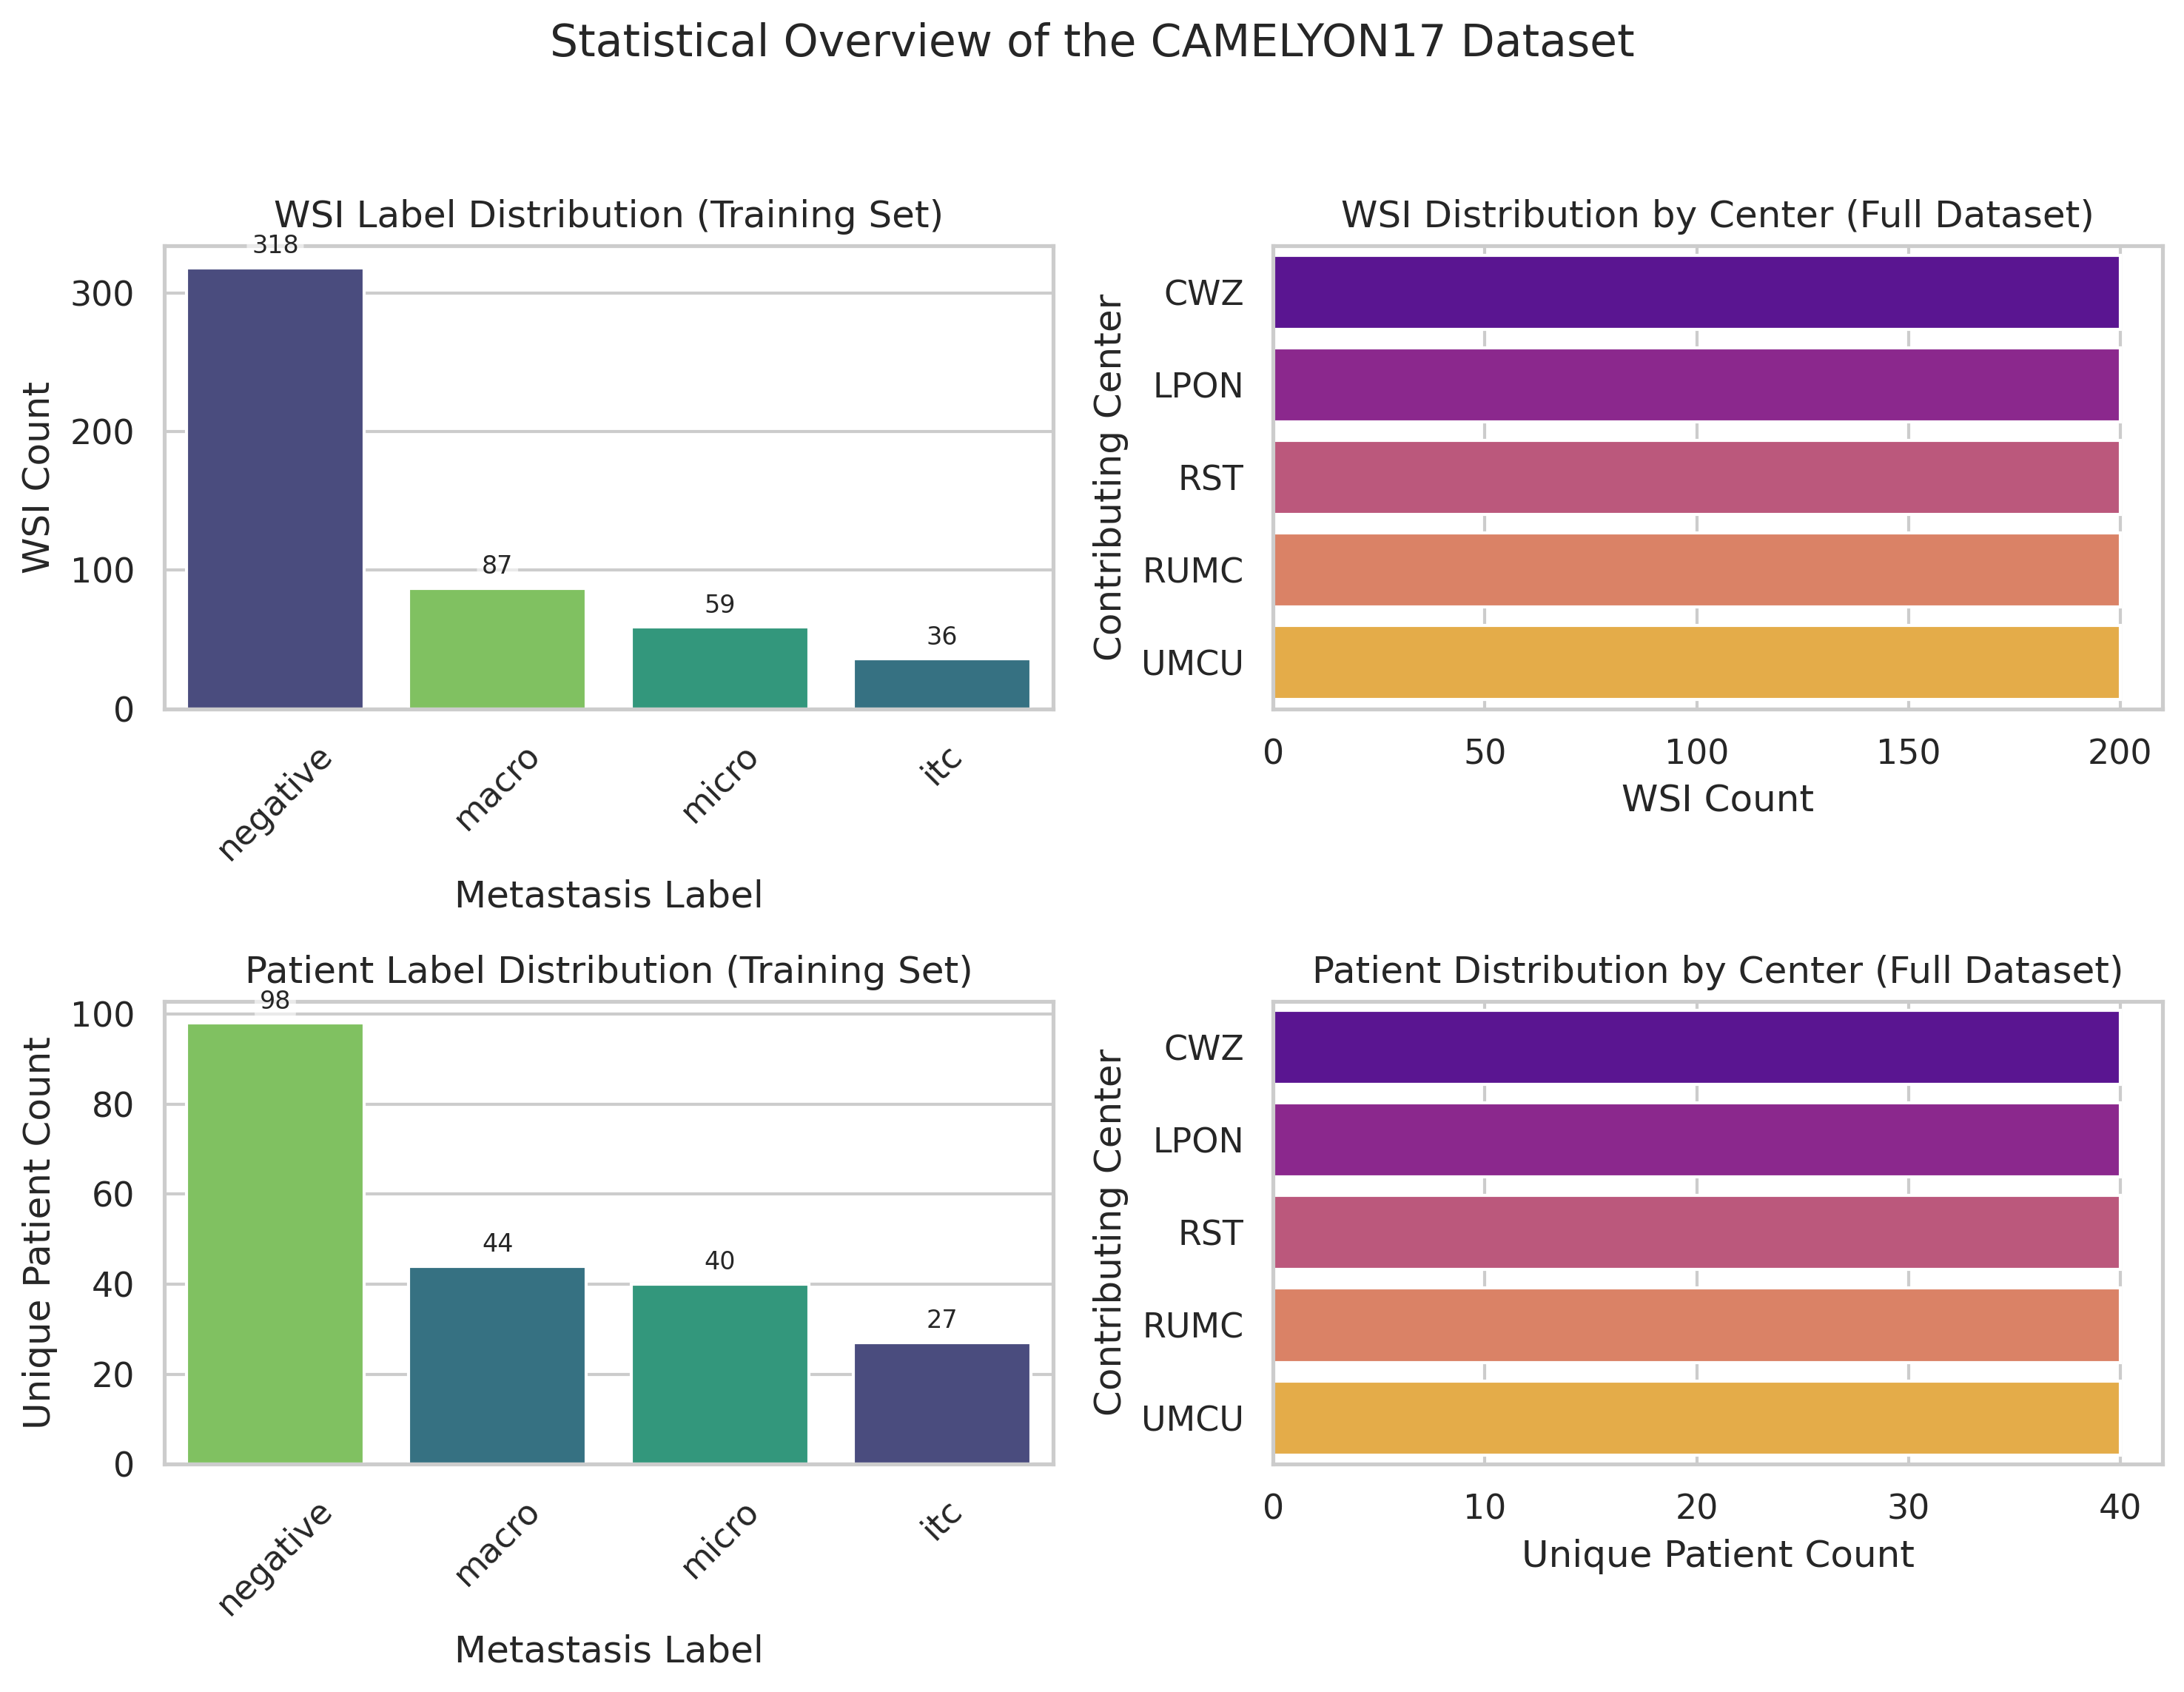

NameError: name 'get_labels_dir' is not defined

In [13]:
from source.analysis import summarize_dataset

summarize_dataset.generate_dataset_statistics()